<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Analista_Inteligencia_comercial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Instalamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

In [ ]:
# Subimos Archivos
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

In [34]:
# leemos los datos
Bancamia = pd.read_excel("/content/07Jul2023 - Prueba_Aplicada_Analista_Int_Ccial.xlsx", sheet_name="Clientes",header=0, index_col=None)
Bancamia.head()

,ID.CLIENTE,GENERO,EDAD_ANOS,CODIGO_CIUDAD_RESIDENCIA,NOMBRE_CIUDAD_RESIDENCIA,NRO_PRESTAMOS_RECIBIDOS,ENDEUDAMIENTO_SISTEMA_FINANCIERO,SALDO_CREDITOS,SALDO_AHORRO,SALDO_CDT,EXCEDENTES DEL NEGOCIO,ANTIGUEDAD_LABORAL_AÑOS,INTEGRANTES_HOGAR,DIAS_MORA_CREDITO
0,1,M,49,5002,ABEJORRAL,2,93931000,260610.00,9179.06,0.0,1664564.00,27,0,0
1,2,M,33,5002,ABEJORRAL,3,36532000,17363398.35,8811.12,0.0,272270.00,11,3,0
2,3,M,24,5002,ABEJORRAL,3,5376000,4889374.78,802.03,0.0,937135.13,9,1,0
3,4,F,68,5002,ABEJORRAL,10,35780000,20953588.43,104107.16,0.0,2352100.00,19,0,0
4,5,M,43,5002,ABEJORRAL,1,30998000,2945404.34,20927.32,0.0,-2456831.06,5,0,0


In [35]:
# revisamos las variables
Bancamia.describe()

,ID.CLIENTE,EDAD_ANOS,CODIGO_CIUDAD_RESIDENCIA,NRO_PRESTAMOS_RECIBIDOS,ENDEUDAMIENTO_SISTEMA_FINANCIERO,SALDO_CREDITOS,SALDO_AHORRO,SALDO_CDT,EXCEDENTES DEL NEGOCIO,ANTIGUEDAD_LABORAL_AÑOS,INTEGRANTES_HOGAR,DIAS_MORA_CREDITO
count,22000.000000,22000.000000,22000.000000,22000.000000,2.200000e+04,2.200000e+04,2.200000e+04,2.200000e+04,2.200000e+04,22000.000000,22000.000000,22000.000000
mean,11000.500000,47.439455,34603.746318,3.004409,1.112503e+07,3.940002e+06,1.239323e+05,4.718618e+04,1.367597e+06,13.405909,1.249955,12.971000
std,6350.997297,13.408229,26912.311963,2.279092,2.207145e+07,5.572439e+06,1.204120e+06,2.100069e+06,6.267671e+06,11.856513,1.341273,56.067653
min,1.000000,19.000000,-8888.000000,1.000000,0.000000e+00,9.830000e+00,0.000000e+00,0.000000e+00,-3.518876e+07,1.000000,0.000000,0.000000
25%,5500.750000,37.000000,11001.000000,1.000000,1.717750e+06,1.045889e+06,3.830950e+02,0.000000e+00,6.063552e+05,7.000000,0.000000,0.000000
50%,11000.500000,48.000000,23660.000000,2.000000,4.581000e+06,2.280543e+06,4.927475e+03,0.000000e+00,1.041171e+06,11.000000,1.000000,0.000000
75%,16500.250000,57.000000,54518.000000,4.000000,1.169525e+07,4.578487e+06,2.879647e+04,0.000000e+00,1.672079e+06,18.000000,2.000000,0.000000
max,22000.000000,119.000000,97001.000000,19.000000,6.213050e+08,1.101067e+08,8.578170e+07,2.900000e+08,8.866483e+08,119.000000,24.000000,1429.000000


In [ ]:
# miramos corelaciones
Bancamia=Bancamia.corr(method="spearman")
sns.heatmap(Bancamia,annot=True) # Diagrama de correlacion

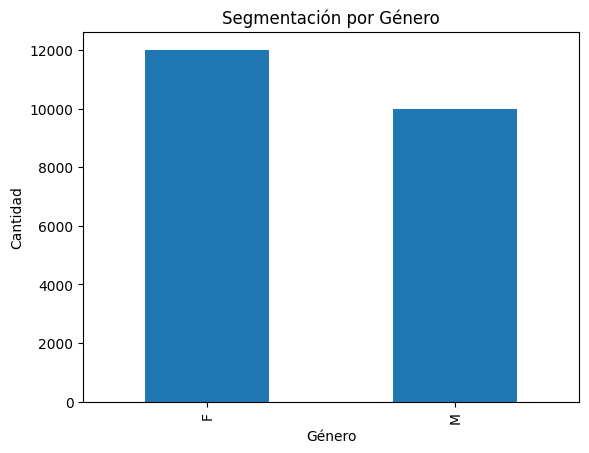

In [36]:
segmento_genero = Bancamia.groupby('GENERO').size()
segmento_genero.plot(kind='bar')
plt.title('Segmentación por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

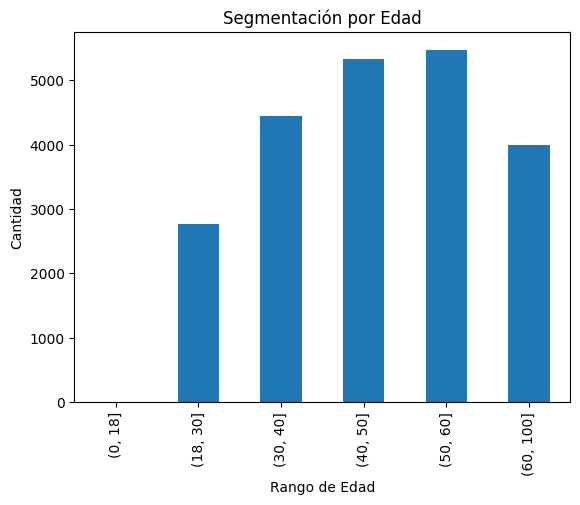

In [38]:
segmento_edad = pd.cut(Bancamia['EDAD_ANOS'], bins=[0, 18, 30, 40, 50, 60, 100])
segmento_edad = segmento_edad.value_counts().sort_index()
segmento_edad.plot(kind='bar')
plt.title('Segmentación por Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.show()

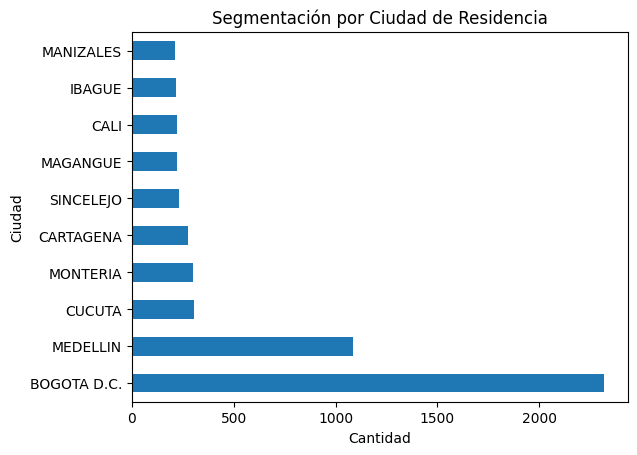

In [44]:
segmento_ciudad = Bancamia.groupby('NOMBRE_CIUDAD_RESIDENCIA').size().sort_values(ascending=False)[:10]
segmento_ciudad.plot(kind='barh')
plt.title('Segmentación por Ciudad de Residencia')
plt.xlabel('Cantidad')
plt.ylabel('Ciudad')
plt.show()


In [ ]:
mujeres_bogota = Bancamia[(Bancamia['GENERO'] == 'F') & (Bancamia['NOMBRE_CIUDAD_RESIDENCIA'] == 'MEDELLIN')]
cantidad_mujeres_bogota = len(mujeres_bogota)
mujeres_bogota

In [ ]:
mujeres_bogota .plot(kind='bar', stacked=True)
plt.title('Relación entre Género y Ciudad de Residencia')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

In [23]:
# Aplica el algoritmo de segmentación (k-means)
k = 3  # Número de segmentos que deseas obtener
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(Bancamia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [25]:
segment_labels = kmeans.labels_
Bancamia['Segment'] = segment_labels

# Analiza las características de cada segmento
segment_data = Bancamia.groupby('Segment').mean()
print(segment_data)

         ID.CLIENTE  EDAD_ANOS  CODIGO_CIUDAD_RESIDENCIA  \
Segment                                                    
0         -0.066240   0.075888                 -0.055202   
1          0.335341  -0.082212                  0.330619   
2         -0.015020   0.372714                 -0.049193   

         NRO_PRESTAMOS_RECIBIDOS  ENDEUDAMIENTO_SISTEMA_FINANCIERO  \
Segment                                                              
0                       0.257193                          0.642464   
1                      -0.026639                         -0.045942   
2                       0.366618                          0.136401   

         SALDO_CREDITOS  SALDO_AHORRO  SALDO_CDT  EXCEDENTES DEL NEGOCIO  \
Segment                                                                    
0              0.690284      0.078402   0.046555                0.564673   
1             -0.065794     -0.005424  -0.014947               -0.043278   
2              0.153327      0.280982   0.25

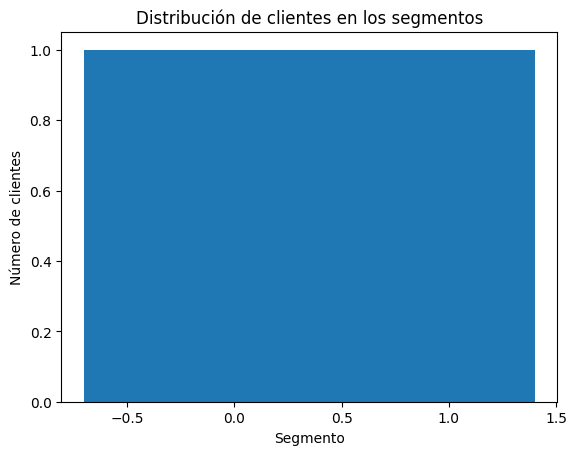

In [29]:
segment_counts = Bancamia['Segment'].value_counts()
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Segmento')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes en los segmentos')
plt.show()

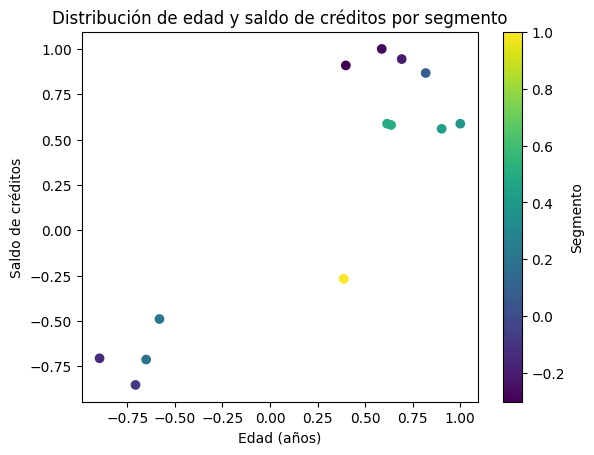

In [31]:
plt.scatter(Bancamia['EDAD_ANOS'], Bancamia['SALDO_CREDITOS'], c=Bancamia['Segment'], cmap='viridis')
plt.xlabel('Edad (años)')
plt.ylabel('Saldo de créditos')
plt.title('Distribución de edad y saldo de créditos por segmento')
plt.colorbar(label='Segmento')
plt.show()